In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Raw-Data/df4Xulu.csv')

data

,Unnamed: 0,channel,spike_timestamp_30khz,cluster_ID,photometry_timestamp_250Hz,x,y
0,0,53.0,38.0,127.0,0,NaN,NaN
1,1,56.0,49.0,133.0,0,NaN,NaN
2,2,95.0,87.0,261.0,0,NaN,NaN
3,3,39.0,140.0,88.0,1,NaN,NaN
4,4,27.0,193.0,53.0,1,NaN,NaN
...,...,...,...,...,...,...,...
3560413,3560413,95.0,107999888.0,261.0,899998,301.25,303.5
3560414,3560414,16.0,107999942.0,31.0,899998,301.25,303.5
3560415,3560415,56.0,107999970.0,133.0,899998,301.25,303.5
3560416,3560416,95.0,107999975.0,261.0,899998,301.25,303.5


In [3]:
# position_info = data[["x", "y", "photometry_timestamp_250Hz"]].set_index("photometry_timestamp_250Hz").sort_index()
# position_info = position_info.groupby("photometry_timestamp_250Hz").mean()
# position_info

position_info = pd.read_csv('../Raw-Data/position4Xulu.csv')[["x", "y"]]

sampling_rate = 250
time = np.arange(len(position_info)) / sampling_rate
position_info = position_info.set_index(pd.Index(time, name="time"))
position_info

,x,y
time,,
0.000,NaN,NaN
0.004,NaN,NaN
0.008,NaN,NaN
0.012,NaN,NaN
0.016,NaN,NaN
...,...,...
3599.984,301.2,303.5
3599.988,301.2,303.5
3599.992,301.2,303.5


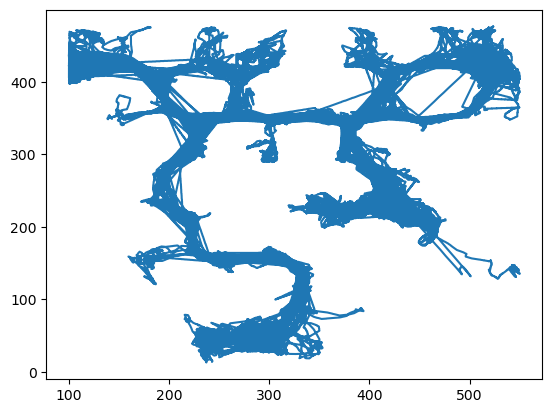

In [4]:
plt.plot(position_info.x, position_info.y)

In [5]:
spike_times = data[["channel", "cluster_ID", "photometry_timestamp_250Hz"]].astype(int).set_index(["channel", "cluster_ID"]).sort_index()
spike_times

photometry_timestamp_250Hz
channel cluster_ID                            
11      12                                2440
        12                                2444
        12                                2449
        12                                2450
        12                                8399
...                                        ...
182     453                             899917
        453                             899922
        453                             899971
        453                             899982
        453                             899986

[3560418 rows x 1 columns]

In [6]:
spike_times.max()

photometry_timestamp_250Hz    899999
dtype: int64

In [7]:

def convert_spike_times_to_indicator(spike_times, time):
    
    n_time = len(time)
    n_cells = len(spike_times.index.unique())

    spikes = np.zeros((n_time, n_cells), dtype=int)
    
    cell_ids = []

    for cell_ind, (cell_id, spike_time_ind) in enumerate(spike_times.groupby(["channel", "cluster_ID"])):
        spikes[spike_time_ind, cell_ind] += 1
        cell_ids.append(cell_id)
        
    return pd.DataFrame(spikes, columns=cell_ids, index=pd.Index(time, name="time"))

spikes = convert_spike_times_to_indicator(spike_times, time)
spikes

,"(11, 12)","(14, 17)","(14, 18)","(14, 19)","(14, 20)","(15, 22)","(15, 23)","(15, 24)","(15, 25)","(15, 26)",...,"(180, 443)","(181, 444)","(181, 445)","(181, 446)","(181, 447)","(181, 448)","(181, 449)","(181, 450)","(181, 451)","(182, 453)"
time,,,,,,,,,,,,,,,,,,,,,
0.000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.004,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0.008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.012,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0.016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599.984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3599.988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3599.992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
spikes.shape

(900001, 225)

In [9]:
position_info.shape

(900001, 2)

In [10]:
is_good_position = np.all(~np.isnan(position_info), axis=1)

position_info = position_info.loc[is_good_position]
spikes = spikes.loc[is_good_position]

In [11]:
spikes.shape

(899745, 225)

In [12]:
position_info.shape

(899745, 2)

<AxesSubplot: >

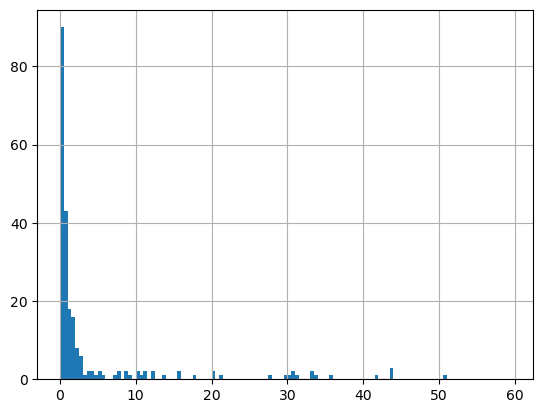

In [13]:
(spikes.mean() * sampling_rate).hist(bins=np.arange(0, 60, 0.5))

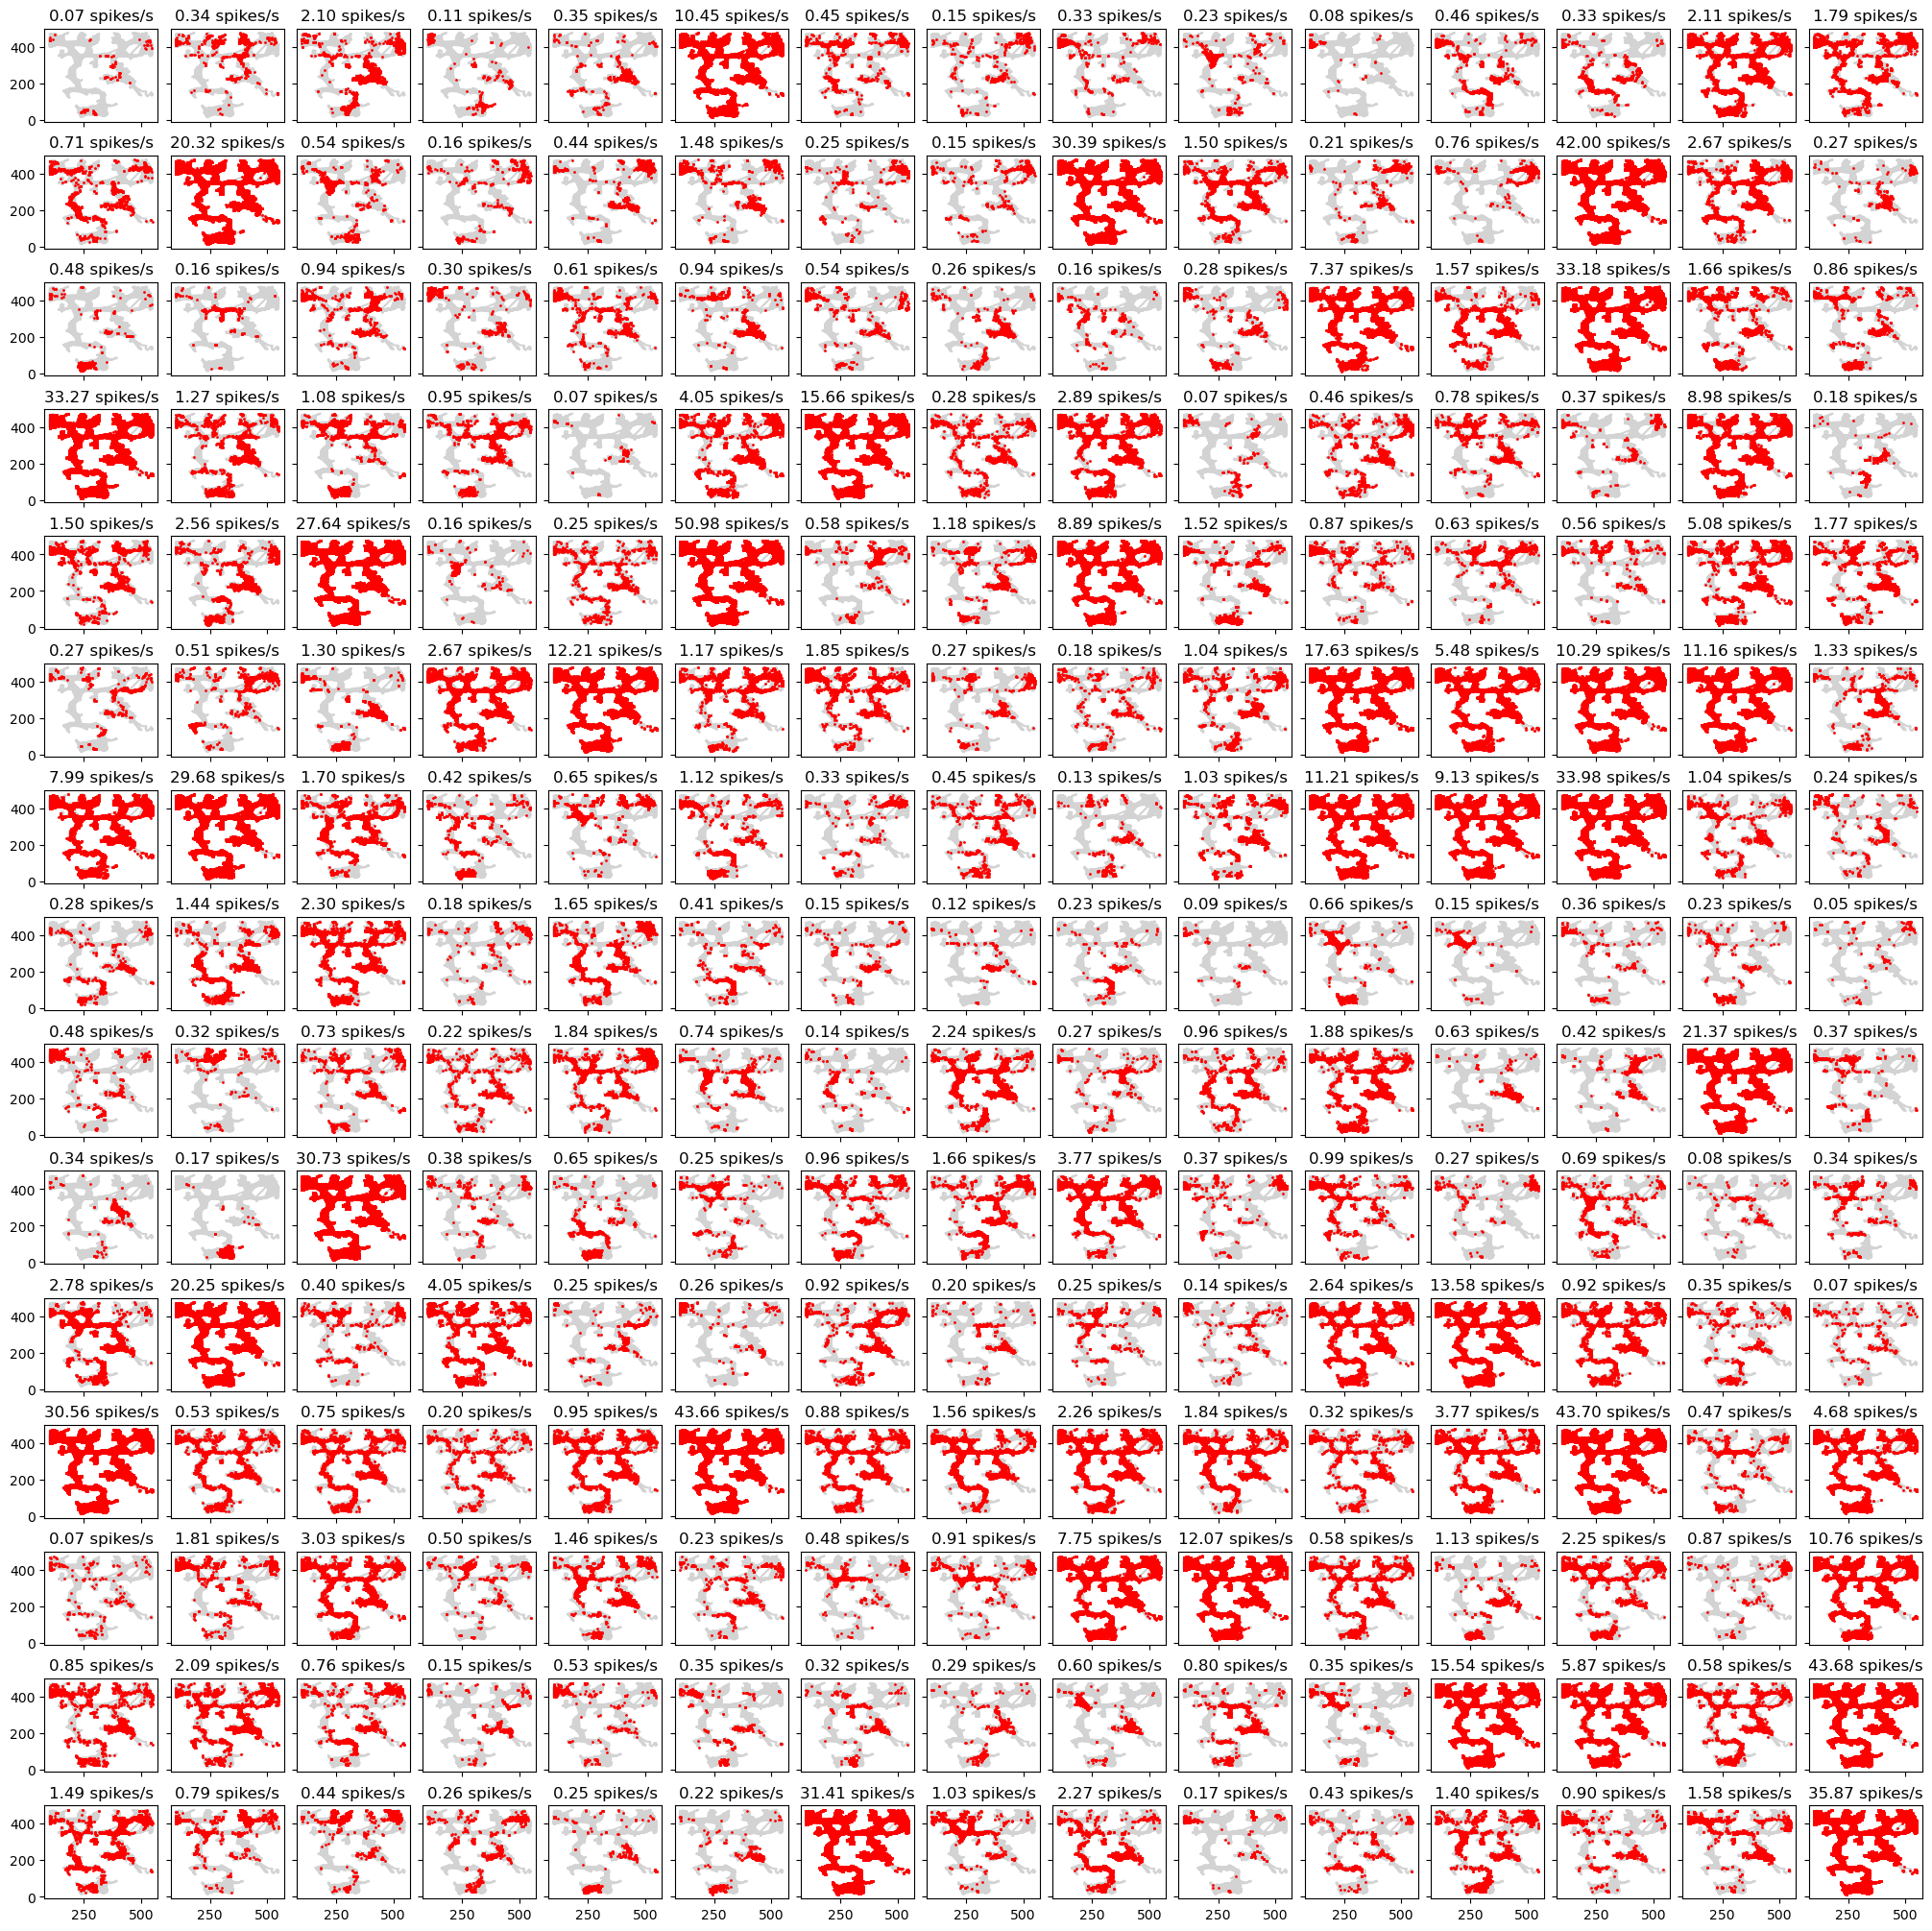

In [51]:
fig, axes = plt.subplots(15, 15, sharex=True, sharey=True, constrained_layout=True, figsize=(20, 20))

for cell_ind, ax in enumerate(axes.flat):
    position_at_spike_times = position_info.loc[spikes.iloc[:, cell_ind] > 0].to_numpy()
    ax.plot(position_info.x, position_info.y, color="lightgrey")
    ax.scatter(position_at_spike_times[:, 0], position_at_spike_times[:, 1], zorder=10, s=1, color="red")
    ax.set_title(f"{spikes.iloc[:, cell_ind].mean() * sampling_rate:0.2f} spikes/s")

In [14]:
# from mountainlab_pytools.mdaio import readmda

# ntrode = readmda('../Raw-Data/firings.mda')
# ntrode.shape
